In [2]:
import numpy as np
import CoolProp.CoolProp as CP
import matplotlib.pyplot as plt

In [ ]:
T_evap = 27 # Evaporating temperature in degree Celsius
T_cond = 8 # Condensing temperature in degree Celsius
fluid = "Ammonia" 

In [ ]:
def calculate_rankine_efficiency(T_evap, T_cond, fluid):
    """
    Function to calculate the efficiency of a Rankine cycle given
    the evaporator and condenser temperatures in Celsius.
    Args:
        T_evap (float): Evaporator temperature in Celsius.
        T_cond (float): Condenser temperature in Celsius.
    Returns:
        float: The efficiency of the Rankine cycle.
    """
    T_evap_K = T_evap + 273.15
    T_cond_K = T_cond + 273.15

    # Get initial state for Rankine cycle
    # 3 -> 4 (Pump, isentropic)
    P3 = CP.PropsSI('P', 'T', T_cond_K, 'Q', 0, fluid)  # Condenser pressure (saturated liquid)
    h3 = CP.PropsSI('H', 'T', T_cond_K, 'Q', 0, fluid)  # Enthalpy at state 3
    s3 = CP.PropsSI('S', 'T', T_cond_K, 'Q', 0, fluid)  # Entropy at state 3

    P1 = CP.PropsSI('P', 'T', T_evap_K, 'Q', 1, fluid)  # Evaporator pressure (saturated vapor)
    P4 = P1  # Because Isobaric heating process in evaporator

    h4 = CP.PropsSI('H', 'P', P4, 'S', s3, fluid)  # Enthalpy at state 4, at pump outlet

    # 4 -> 1 (Boiler, heat addition at constant pressure)
    h1 = CP.PropsSI('H', 'T', T_evap_K, 'Q', 1, fluid)  # Saturated vapor enthalpy at evaporator
    s1 = CP.PropsSI('S', 'T', T_evap_K, 'Q', 1, fluid)

    # 1 -> 2 (Turbine, isentropic)
    P2 = P3  # Because isobaric condensation process in condenser
    s2 = s1  # Because isentropic process in turbine
    h2 = CP.PropsSI('H', 'P', P2, 'S', s2, fluid)  # Approx. enthalpy at state 2 (isentropic)

    # Calculate heat added and work done
    heat_added = h1 - h4  # Boiler
    work_pump = h4 - h3   # Pump
    work_turbine = h1 - h2  # Turbine
    net_work = work_turbine - work_pump

    # Calculate efficiency
    efficiency = net_work / heat_added
    return efficiency

In [5]:
temp_range = np.linspace(-2, 2, 50)  # Temperature variation range for both T_cond and T_evap

T_evap_grid, T_cond_grid = np.meshgrid(T_evap + temp_range, T_cond + temp_range)

# Initialize an array to hold the efficiencies
efficiency_grid = np.zeros(T_evap_grid.shape)

# Calculate efficiency for each combination of T_evap and T_cond
for i in range(len(temp_range)):
    for j in range(len(temp_range)):
        T_evap = T_evap_grid[i, j]
        T_cond = T_cond_grid[i, j]
        efficiency_grid[i, j] = calculate_rankine_efficiency(T_evap, T_cond, fluid)


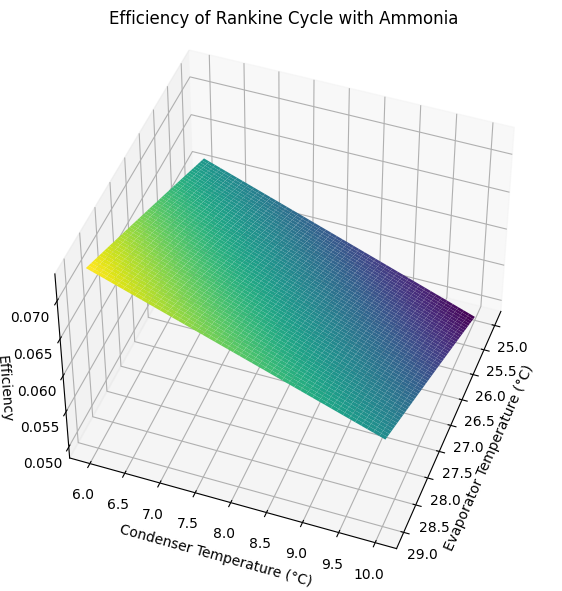

In [6]:

# Plotting the 3D surface plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
ax.plot_surface(T_evap_grid, T_cond_grid, efficiency_grid, cmap='viridis')

# Labels and title
ax.set_xlabel("Evaporator Temperature (°C)")
ax.set_ylabel("Condenser Temperature (°C)")
ax.set_zlabel("Efficiency")
ax.set_title("Efficiency of Rankine Cycle with Ammonia")


ax.view_init(elev=45, azim=20)
plt.show()